<a href="https://colab.research.google.com/github/act-moises/diplomado/blob/main/Limpieza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Limpieza

Primero cargamos la info de nuestra base y la restructuramos para poder visualizar todo el contenido perfectamente

In [ ]:
uploaded = files.upload()
dx = pd.read_excel("riesgo.xlsx", header=None)
dx.columns = ['Pais','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11']
len(dx)

Saving riesgo.xlsx to riesgo (13).xlsx


118

In [ ]:
uploaded = files.upload()
dv= pd.read_excel("riesgo.xlsx", sheet_name="Sheet2", header=None)
V3 = dv.iloc[15:21][1]
V7 = dv.iloc[22:26][1]
V3.reset_index(drop=True, inplace=True)
V7.reset_index(drop=True, inplace=True)
VAL = pd.DataFrame({'V3:políticas de aborto':V3.iloc[1:], 'V7:nivel de VIH/SIDA en las mujeres':V7.iloc[1:]})
VAL.T

Saving riesgo.xlsx to riesgo (25).xlsx


,1,2,3,4,5
V3:políticas de aborto,0 puntos disponible cuando se necesita,10 permitida según criterios sociales y salud ...,50 permitida según criterios salud,70 permitida sólo en casos especiales (violaci...,80 ilegal sólo permitida para salvar la vida d...
V7:nivel de VIH/SIDA en las mujeres,0 puntos tasas bajas de infección VIH menor 1%,"50 tasas medianas tasa [1%,5%]",90 tasas altas mayores a 5%,NaN,NaN


In [ ]:
dv.index

Index([  'v1',   'v2',  'v3 ',   'v4',  'v5 ',   'v6',   'v7',   'v8',   'v9',
        'v10', 'v11 ',    nan,    nan,    nan,    nan,  'v3 ',    nan,    nan,
          nan,    nan,    nan,    nan,   'v7',    nan,    nan,    nan],
      dtype='object', name=0)

In [ ]:
dv.index = dv[0]
dv = dv[[1,2]].iloc[0:11].T
dv

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11
1,nacimientos anuales por 100 mujeres de 15 a 19...,% mujeres que usan anticoncepción,políticas de aborto,% embarazadas con anemia,% mujeres que reciben atencion prenatal,% partos asistidos por personal capacitado,nivel de VIH/SIDA en las mujeres,% infecundidad en las mujeres,promedio de nacimientos por mujer,"muertes maternas por 100,000 nacimientos",calificación de riesgo
2,nacanual,anticoncep,abort,anemia,atnprenat,partoasit,vihsida,infecun,nacpormuj,muertes,calif


Empezamos a buscar si hay valores atipicos o datos que limpiar en la base

In [ ]:
dx.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,118.000000,118.000000,118.000000,118.000000,116.000000,116.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,8.381356,42.364407,3.203390,43.618644,72.543103,67.534483,1.398305,5.694915,4.138136,289.661017,37.865254
std,6.451554,27.144962,1.488183,18.066316,26.652153,30.304091,0.693558,3.560247,2.012904,323.593847,19.994244
min,0.000000,2.000000,1.000000,8.000000,2.000000,2.000000,1.000000,2.000000,1.200000,3.000000,6.600000
25%,3.000000,13.250000,2.000000,31.750000,52.750000,42.750000,1.000000,3.000000,2.100000,18.000000,18.200000
50%,6.000000,47.000000,3.000000,46.000000,79.500000,71.500000,1.000000,5.000000,3.850000,147.500000,37.700000
75%,13.000000,67.000000,5.000000,55.000000,95.250000,98.000000,2.000000,6.750000,6.075000,490.000000,53.575000
max,24.000000,86.000000,5.000000,88.000000,100.000000,100.000000,3.000000,21.000000,7.600000,1750.000000,76.500000


In [ ]:
dx[dx.isna().any(axis=1)]

,Pais,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
20,Suiza,1,71,3,17,NaN,99.0,1,5,1.5,4,14.3
86,Laos,5,18,5,62,NaN,20.0,1,5,6.3,300,52.4
114,Congo,15,15,3,54,35.0,NaN,3,21,5.5,900,72.1
117,Zaire,23,8,5,76,90.0,NaN,3,21,6.7,800,76.5


Pareciera que hay un valor atipico en la variable 10, el valor máximo se aleja mucho de percentil 75% así que lo contrastaremos adelante.

Para los valores nulos tenemos un total de 4 valores repartidos en las variables 5 y 6. Para no perder los demás datos de estos registros reemplazaremos los valores nulos por la media de los respectivos campos.

In [ ]:
# Ejecutamos los cambios antes mencionados
dx.loc[[20,86],'V5'] = dx['V5'].mean()
dx.loc[[114,117],'V6'] = dx['V6'].mean()
dx.iloc[[20,86,114,117]][['V5','V6']]

,V5,V6
20,72.543103,99.000000
86,72.543103,20.000000
114,35.000000,67.534483
117,90.000000,67.534483


Procedemos a indagar más en el campo V10 para saber como tratar el valor de 1750

In [ ]:
# prompt: Corrige esto : plt.scatter(dx.index, dx['V10'], ColourType='blue')

plt.scatter(dx.index, dx['V10'], color='blue')

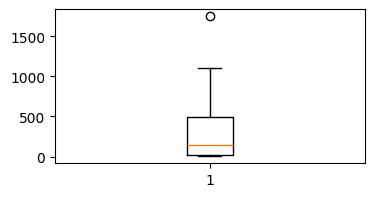

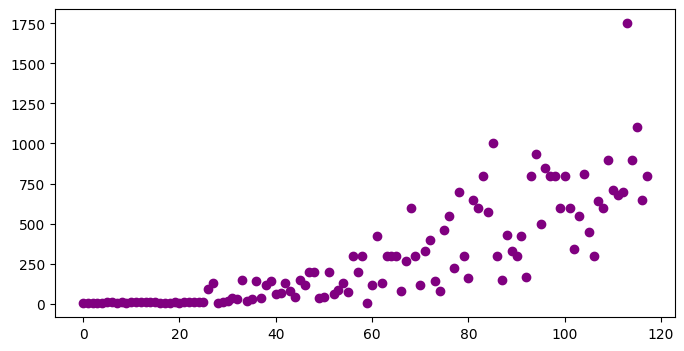

In [ ]:
# Visualizamos la gráfica de cajas y una de disperción sobre V10
plt.figure(figsize=(4,2))
plt.boxplot(dx['V10'])
plt.show()
plt.figure(figsize=(8,4))
plt.scatter(dx.index, dx['V10'], color='purple')
plt.show()

In [ ]:
# Identificamos el registro separado
dx[dx['V10']>=1000]

,Pais,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
85,Ghana,13,13,3,64,82.0,59.0,2,3,6.0,1000,52.1
113,Malí,20,5,5,65,31.0,27.0,2,8,7.1,1750,71.1
115,Somalia,21,5,5,73,2.0,2.0,1,10,7.0,1100,72.8


Observamos que el valor pertenese a Malí y que, por la diferencia contra los siguientes registros más altos, tomamos la decisión de conservar el registro ya que consideramos que es un valor factible y en consecuencia, util para el análisis del problema

Una vez resuelto este caso, buscamos en los demás campos si hay algún valor que no concuerde con las descripciones del campo. Omitimos la columna V11 para dejar su análisis para más adelante en el trabajo.

In [ ]:
# Volvemos a ver la descripción de variables
dv

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11
1,nacimientos anuales por 100 mujeres de 15 a 19...,% mujeres que usan anticoncepción,políticas de aborto,% embarazadas con anemia,% mujeres que reciben atencion prenatal,% partos asistidos por personal capacitado,nivel de VIH/SIDA en las mujeres,% infecundidad en las mujeres,promedio de nacimientos por mujer,"muertes maternas por 100,000 nacimientos",calificación de riesgo
2,nacanual,anticoncep,abort,anemia,atnprenat,partoasit,vihsida,infecun,nacpormuj,muertes,calif


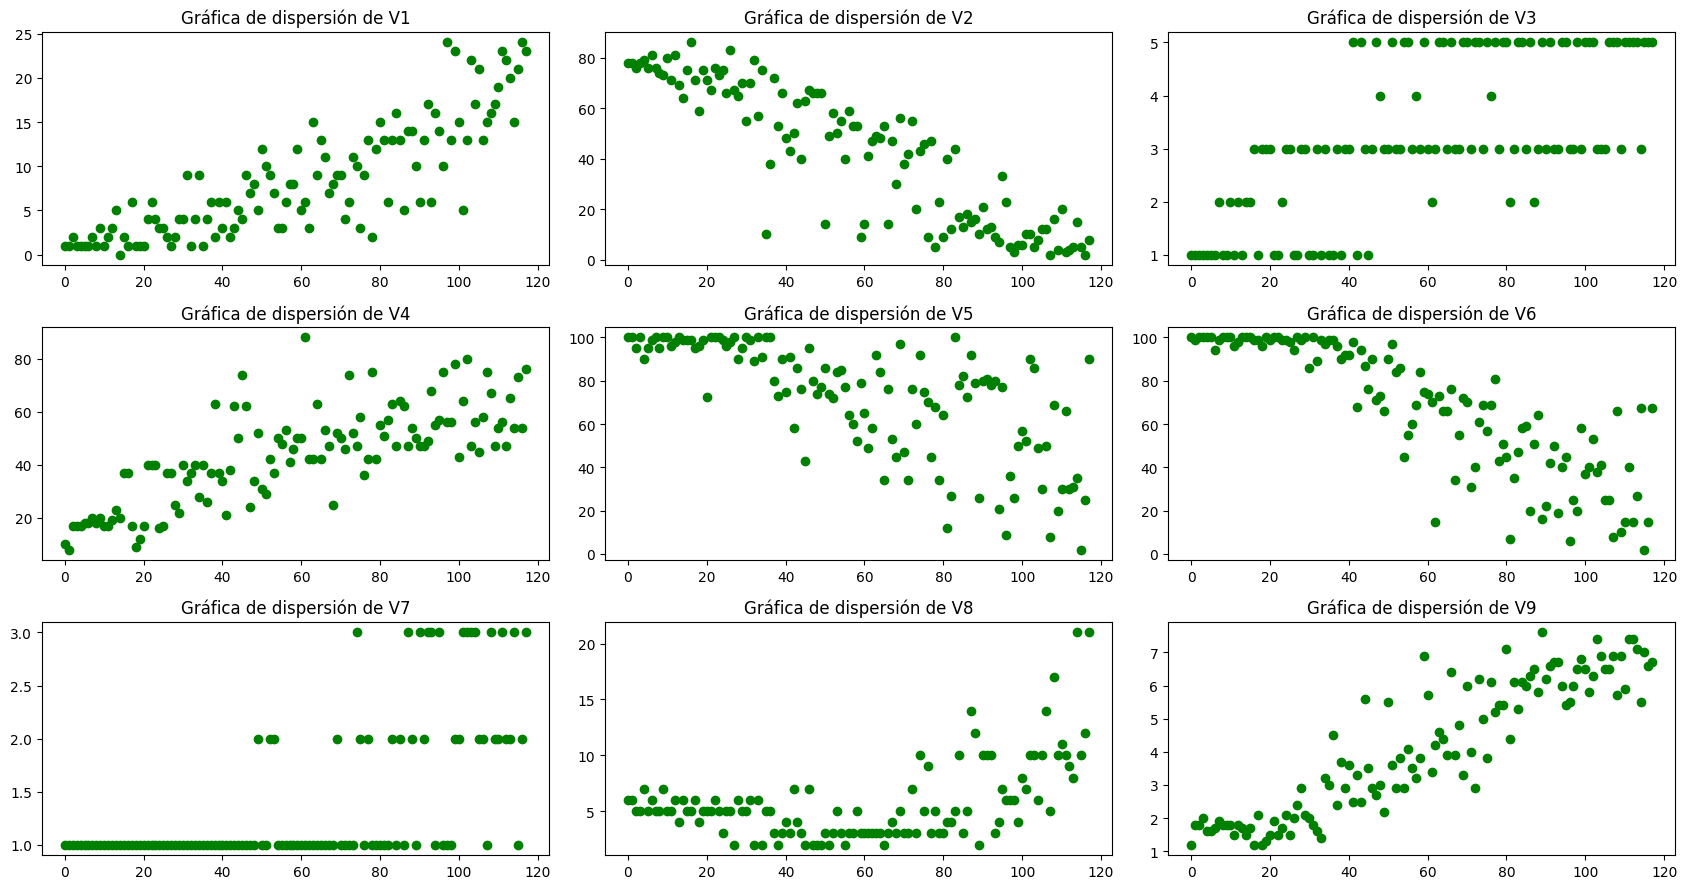

In [ ]:
# Vemos las demás gráficas de dispersión
fig, axes = plt.subplots(3, 3, figsize=(17, 9))
for i, variable in enumerate(dx.columns[1:10]):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(dx.index, dx[variable], color='green')
    axes[row, col].set_title(f'Gráfica de dispersión de {variable}')
plt.tight_layout()
plt.show()

In [ ]:
VAL.T

,1,2,3,4,5
V3:políticas de aborto,0 puntos disponible cuando se necesita,10 permitida según criterios sociales y salud ...,50 permitida según criterios salud,70 permitida sólo en casos especiales (violaci...,80 ilegal sólo permitida para salvar la vida d...
V7:nivel de VIH/SIDA en las mujeres,0 puntos tasas bajas de infección VIH menor 1%,"50 tasas medianas tasa [1%,5%]",90 tasas altas mayores a 5%,NaN,NaN


Concluimos que el resto de las demás variables tienen un comportaminto dentro de lo inferido a partir de lo que describen los campos, por lo que no hay más datos que modificar para la limpieza de datos.

Como dato a resaltar, vemos que los campos con info. adicional que aparecian en el archivo de la base (V3  y V7), tienen una modificación a la hora de su aparición dentro de la base, dando una relación 1:1 entre los rangos de 1 a 5 y 1 a 3 respectivamente. Decidimos conservar las columnas tal cual para respetar la asignación de los creadores de la base.

# Estandarización de valores (intervalo de 0 a 1)

Adicionalmete creemos conveniente trasnformar los datos antes de ir al siguiente proceso, esto con el objetivo de no dar mayor peso a las variables con mayor escala y por ello obtener un mejor resultado en el calculo de nuestas componentes.

Para ello, hacemos una transformación de escala a los datos y los pasamos al intervalo de (0,1). Por lo mismo, hay que hacer una distinción en el proceso para aquellas variables que representan un porcentaje, dividiendo estas mismas columnas entre 100 y el resto utilizando una normalización min-max.

In [ ]:
# Transformamos para los campos de porcentajes
dn = dx[['V2','V4','V5','V6','V8']]
dn = dn/100
dn.head(1)

,V2,V4,V5,V6,V8
0,0.78,0.1,1.0,1.0,0.06


In [ ]:
# Transformamos los demás datos
dz = dx[['V1','V3','V7','V9','V10']]
dz = (dz-dz.min())/(dz.max()-dz.min())
dn[['V1','V3','V7','V9','V10']] = dz
dn.head(1)

,V2,V4,V5,V6,V8,V1,V3,V7,V9,V10
0,0.78,0.1,1.0,1.0,0.06,0.041667,0.0,0.0,0.0,0.000572


In [ ]:
# Ornenamod la base para pasar al análisis PCA
DN = dn[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10']]
DN

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,0.041667,0.78,0.0,0.10,1.00,1.000000,0.0,0.06,0.000000,0.000572
1,0.041667,0.78,0.0,0.08,1.00,0.990000,0.0,0.06,0.093750,0.000000
2,0.083333,0.76,0.0,0.17,0.95,1.000000,0.0,0.05,0.093750,0.000000
3,0.041667,0.78,0.0,0.17,1.00,1.000000,0.0,0.05,0.125000,0.001145
4,0.041667,0.79,0.0,0.17,0.90,1.000000,0.0,0.07,0.062500,0.000000
...,...,...,...,...,...,...,...,...,...,...
113,0.833333,0.05,1.0,0.65,0.31,0.270000,0.5,0.08,0.921875,1.000000
114,0.625000,0.15,0.5,0.54,0.35,0.675345,1.0,0.21,0.671875,0.513452
115,0.875000,0.05,1.0,0.73,0.02,0.020000,0.0,0.10,0.906250,0.627934
116,1.000000,0.02,1.0,0.54,0.25,0.150000,0.5,0.12,0.843750,0.370349


Con esto, tenemos la base lista la información y podemos ir al análisis PCA.